In [1]:
from compute import Var, Par, Model, adda, addf, ureg, Evaluable, buildidpvars
from compute import RefNode, SolverNode, addsolver, geteqs, END
from representations import render_tree, digraph_repr, drawfull, tree_incidence
from notation import graphs_from_incidence, make_acyclic, solvers_bottom_up, generate_execution, default_sequence
from datastructures import notation_from_tree
from operators import merge_pure
from anytree import LevelOrderIter
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
x,c,d,a,b = Var('x'), Var('c'), Var('d'), Var('a'), Var('b')

In [19]:
model = Model()
m = RefNode(name='/', ref=model)
f0 = addf(m, -y+x, name='f_{0}')
f1 = addf(m, -a+c+y, name='f_{1}')
b = adda(m, 'b', a)
#r_3 = addf(m, b+d)
#r_4 = addf(m, a+d)
#s2 = addsolver(m, [], [(r_4, d)], name='s2')
e = adda(m, 'e', c+b)

In [20]:
#f_0, f_1, f_2, f_5 = geteqs(m, [y,a,b, e])
f_2, f_3 = geteqs(m, [b, e])

In [11]:
f_5

<f_{3}>

In [21]:
s1 = addsolver(m, [f_2, f_3], [(f1, a), (f0, y)], name='s1') # could still be cyclic at this point
#f_1.node_type = END
#f_2.node_type = END
#s1 = addsolver(m, [f_0, f_1, f_2, s2], [(r_3, c)], name='s1') # could still be cyclic at this point

In [22]:
render_tree(m, True)

/               
└── s1, SOLVER  
    ├── f_{2}, INTER
    ├── f_{3}, INTER
    ├── f_{1}, END
    └── f_{0}, END


In [14]:
G, graphs = graphs_from_incidence(m, True)

In [7]:
m2 = make_acyclic(m, graphs)

In [8]:
render_tree(m2, True)

/               
├── f_{0}, INTER
├── f_{1}, INTER
├── f_{2}, INTER
└── f_{3}, INTER


# Force order

In [9]:
#order=[f_2,f_1,s2,f_0]

In [15]:
G, graphs = graphs_from_incidence(m)

In [16]:
G_order = G

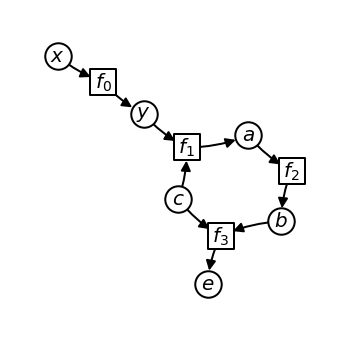

In [12]:
drawfull(G_order, model.eqs)

In [32]:
sequence_m = [f_2,f_1,f_0,f_5]

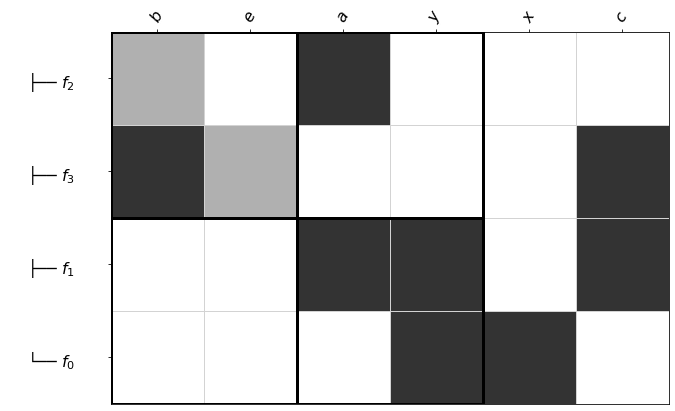

In [23]:
eqs, eqv, dout, dins = model.data_structures()
sequence_m = default_sequence(m)
fig, ax = tree_incidence(m, eqv, model.outset, sequence_m, figsize=(10,10));
plt.sca(ax)
plt.savefig('figures/order_tear_equiv.png', dpi=600, bbox_inches='tight')

In [18]:
G_order = G

In [19]:
order = [f_2,f_1,f_0,f_5]

In [20]:
solvefor = dict()
while order:
    fx = order.pop(0)
    outs = [node for elt in order for node in G_order.successors(elt)]
    for var in G_order.predecessors(fx):
        if var in outs:
            solvefor[fx] = var

In [21]:
solvefor

{<f_{2}>: a, <f_{1}>: y}

In [40]:
# need to convert these to end components